# Model Selection
> Model selection Model selection is a critical step in the modeling procedure where you compare, evaluate, and choose the best predictive model from a set of candidates. The goal of model selection is to identify the model that will perform best on future data, not just the training set. The process typically involves:
> - Comparing different algorithms (e.g., linear regression, decision trees, random forests, etc.).
> - Tuning model hyperparameters to optimize performance.
> - Using statistical criteria (such as AIC, BIC, or adjusted R²) and/or validation metrics (such as accuracy, RMSE, ROC-AUC) to assess model quality.
> - Employing cross-validation or holdout validation to estimate how well each model generalizes to new, unseen data.
> - Selecting the model that best balances predictive accuracy, interpretability, and complexity for your specific problem.

## Initialization

In [1]:
import pandas as pd
import numpy as np
import os
import rich

## Load Data

In [2]:
input_folder = "../.local/analysis_pipeline/data_exploration"
model_data = pd.read_parquet(f"{input_folder}/model_data.parquet")
print( model_data.shape )
model_data.head(5)

(60392, 24)


,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,...,annual_premium,agecat2,pol_year,pol_quarter,veh_cnt,claim_sev,claim_sev_capped,claim_amt_capped,fold,sample
0,64080188,2017-07-10,M,2.0,1989-01-04,631.0,B,140.9,4,TRUCK,...,716.53,5.0,2017,3,1,NaN,NaN,0.000000,3,1|bld
1,18917133,2017-07-31,M,2.0,1985-06-21,531.0,C,136.5,3,HBACK,...,716.53,5.0,2017,3,1,583.010876,583.010876,583.010876,4,2|val
2,82742606,2017-02-01,M,6.0,1942-07-25,838.0,D,88.8,3,SEDAN,...,716.53,1.0,2017,1,1,159.375757,159.375757,159.375757,1,1|bld
3,43601997,2017-10-17,M,5.0,1959-06-08,835.0,E,NaN,2,SEDAN,...,716.53,2.0,2017,4,1,NaN,NaN,0.000000,3,1|bld
4,58746861,2017-04-13,F,4.0,1967-05-16,748.0,C,123.0,3,HBACK,...,716.53,3.0,2017,2,1,143.555642,143.555642,143.555642,3,1|bld


## Model Evaluation

In [3]:
# Example: multiply by 1.1 and add normal noise with mean 0 and std 100
model_data['pesudo_pred_claim_amt_capped'] = (
    model_data['claim_amt_capped'] * 1.1 +
    np.random.normal(loc=0, scale=100, size=len(model_data))
)

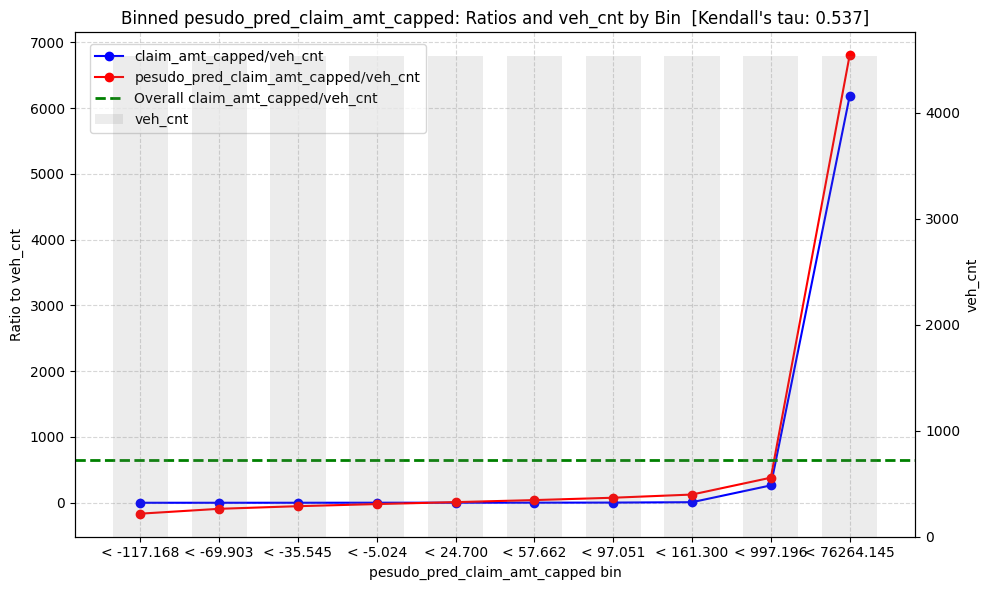

In [8]:
import sys
sys.path.append(os.path.abspath(".."))
from analysis_tool_chest.data_exploration import PredictivenessCheck

# Example setup
data = model_data.loc[model_data['sample'] == '1|bld']  
exp_var = 'veh_cnt'
pred_var = 'pesudo_pred_claim_amt_capped' 
var_1 = 'claim_amt_capped'     
var_2 = 'pesudo_pred_claim_amt_capped'    
nbins = 10        

# Create and run the PredictivenessCheckList
pc = PredictivenessCheck(
    df=data,
    pred_var=pred_var,
    exp_var=exp_var,
    var_1=var_1,
    var_2=var_2,     
)

pc.binning(nbins=10)
pc.aggregate()
pc.plot()